In [1]:
!pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [2]:
from imblearn.over_sampling import SMOTE
import os

In [3]:
termtrain= pd.read_csv(r'C:\Users\KulkarniPa\Downloads\INeuron\PawanDataPractice\bankingdata classfication\train.csv')
termtrain.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
testterm=pd.read_csv(r'C:\Users\KulkarniPa\Downloads\INeuron\PawanDataPractice\bankingdata classfication\test.csv')
testterm.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
termtrain.isnull().sum(), testterm.isnull().sum()

(ID            0
 age           0
 job           0
 marital       0
 education     0
 default       0
 balance       0
 housing       0
 loan          0
 contact       0
 day           0
 month         0
 duration      0
 campaign      0
 pdays         0
 previous      0
 poutcome      0
 subscribed    0
 dtype: int64,
 ID           0
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 dtype: int64)

In [6]:
termtrain.shape

(31647, 18)

In [7]:
testterm.shape

(13564, 17)

In [8]:
termtrain['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [9]:
EduRatio=pd.DataFrame({'Job':[]})
for i in termtrain['job'].unique():
    EduRatio = EduRatio.append(termtrain[(termtrain["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / termtrain[(termtrain["job"] == i)]["education"].value_counts().sum())
EduRatio["Job"] = termtrain["job"].unique()
EduRatio

,Job,education
secondary,admin.,82.153677
unknown,unknown,47.087379
secondary,services,83.396486
tertiary,management,82.301551
secondary,technician,68.890145
secondary,retired,43.392630
secondary,blue-collar,54.808536
primary,housemaid,49.771167
tertiary,self-employed,52.894034
secondary,student,54.488189


In [12]:
termtrain.loc[(termtrain.job == 'unknown') & (termtrain.education == 'secondary'), 'job'] = 'services'
termtrain.loc[(termtrain.job == 'unknown') & (termtrain.education == 'primary'), 'job'] = 'housemaid'
termtrain.loc[(termtrain.job == 'unknown') & (termtrain.education == 'tertiary'), 'job'] = 'management'
termtrain.loc[(termtrain.job == 'unknown' ),'job'] = 'services'

In [13]:
termtrain['job'].value_counts()

blue-collar      6842
management       6662
technician       5307
admin.           3631
services         3049
retired          1574
self-employed    1123
entrepreneur     1008
housemaid         911
unemployed        905
student           635
Name: job, dtype: int64

In [14]:
termtrain['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [15]:
termtrain['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [20]:
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "admin."),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "management"),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "services"),"education"] = "tertiary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "technician"),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "retired"),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "blue-collar"),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "housemaid"),"education"] = "primary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "student"),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "unemployed"),"education"] = "secondary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "entrepreneur"),"education"] = "tertiary"
termtrain.loc[(termtrain.education == "unknown") & (termtrain.job == "self-employed"),"education"] = "tertiary"
termtrain.loc[(termtrain.education == 'unknow'), 'education'] = 'secondary'

In [21]:
termtrain['education'].value_counts()

secondary    17219
tertiary      9586
primary       4842
Name: education, dtype: int64

In [22]:
testterm['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

In [26]:
EduRatio1=pd.DataFrame({'Job':[]})
for i in testterm['job'].unique():
    EduRatio1 = EduRatio1.append(testterm[(testterm["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / testterm[(testterm["job"] == i)]["education"].value_counts().sum())
EduRatio1["Job"] = testterm["job"].unique()
EduRatio1

,Job,education
secondary,services,82.813749
secondary,retired,48.985507
tertiary,self-employed,54.166667
secondary,blue-collar,60.553633
tertiary,management,82.901738
secondary,technician,71.703057
secondary,admin.,83.961039
secondary,unemployed,61.557789
primary,housemaid,55.464481
tertiary,entrepreneur,48.643006


In [27]:
testterm.loc[(testterm.education == "unknown") & (testterm.job == "admin."),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "management"),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "services"),"education"] = "tertiary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "technician"),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "retired"),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "blue-collar"),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "housemaid"),"education"] = "primary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "student"),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "unemployed"),"education"] = "secondary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "entrepreneur"),"education"] = "tertiary"
testterm.loc[(testterm.education == "unknown") & (testterm.job == "self-employed"),"education"] = "tertiary"
testterm.loc[(testterm.education == 'unknown'), 'education'] = 'secondary'

In [28]:
testterm['education'].value_counts()

secondary    7433
tertiary     4077
primary      2054
Name: education, dtype: int64

In [29]:
termtrain['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [30]:
termtrain['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [32]:
termtrain['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [34]:
termtrain['contact'].replace(['unknown'], termtrain['contact'].mode(), inplace=True)

In [35]:
termtrain['contact'].value_counts()

cellular     29600
telephone     2047
Name: contact, dtype: int64

In [36]:
termtrain.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [37]:
termtrain['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [38]:
termtrain['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [39]:
termtrain['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [43]:
termtrain['poutcome']

0        unknown
1        unknown
2        unknown
3        success
4        unknown
          ...   
31642    unknown
31643    unknown
31644    unknown
31645    failure
31646    unknown
Name: poutcome, Length: 31647, dtype: object

In [47]:
termtrain.loc[(termtrain.poutcome == "unknown"),"poutcome"] = 0
termtrain.loc[(termtrain.poutcome == "failure") ,"poutcome"] = 1
termtrain.loc[(termtrain.poutcome == "other"),"poutcome"] = 2
termtrain.loc[(termtrain.poutcome == "success"),"poutcome"] = 3

termtrain.loc[(termtrain.default == "yes"),"default"] = 1
termtrain.loc[(termtrain.default == "no"),"default"] = 0


In [48]:
termtrain.loc[(termtrain.balance > 66721),"balance"] = 66721
#Lets scale balance column.
termtrain["balance"]= termtrain["balance"] / 66721

In [49]:
termtrain.loc[(termtrain.housing == "yes"),"housing"] = 1 # housing column label encoding
termtrain.loc[(termtrain.housing == "no") ,"housing"] = 0

#Loan column label encoding
termtrain.loc[(termtrain.loan == "yes"),"loan"] = 1
termtrain.loc[(termtrain.loan == "no") ,"loan"] = 0

#contact column label encoding
termtrain.loc[(termtrain.contact == "telephone"),"contact"] = 1 # 0 means cellular 1 means telephone
termtrain.loc[(termtrain.contact == "cellular") ,"contact"] = 0

In [50]:
termtrain.drop(columns = ["duration"],inplace = True)

In [52]:
#Pdyas means how many cays after last contact, so we should changed  value -1 to 99.
termtrain.loc[(termtrain.pdays == -1),"pdays"] = 99

In [53]:
termtrain.loc[(termtrain.subscribed == "yes"),"subscribed"] = 1 # 0 means subscribed no 1 means yes
termtrain.loc[(termtrain.subscribed == "no") ,"subscribed"] = 0

In [54]:
termtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          31647 non-null  int64  
 1   age         31647 non-null  int64  
 2   job         31647 non-null  object 
 3   marital     31647 non-null  object 
 4   education   31647 non-null  object 
 5   default     31647 non-null  object 
 6   balance     31647 non-null  float64
 7   housing     31647 non-null  object 
 8   loan        31647 non-null  object 
 9   contact     31647 non-null  object 
 10  day         31647 non-null  int64  
 11  month       31647 non-null  object 
 12  campaign    31647 non-null  int64  
 13  pdays       31647 non-null  int64  
 14  previous    31647 non-null  int64  
 15  poutcome    31647 non-null  object 
 16  subscribed  31647 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 4.1+ MB


In [55]:
termtrain['job']

0            admin.
1          services
2          services
3        management
4        technician
            ...    
31642    management
31643    management
31644    management
31645    technician
31646    management
Name: job, Length: 31647, dtype: object

In [57]:
termtrain['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [62]:
termtrain.loc[(termtrain.job == "blue-collar"),"job"] = 0
termtrain.loc[(termtrain.job == "management"),"job"] = 1
termtrain.loc[(termtrain.job == "technician"),"job"] = 2
termtrain.loc[(termtrain.job == "admin."),"job"] = 3
termtrain.loc[(termtrain.job == "services"),"job"] = 4
termtrain.loc[(termtrain.job == "retired"),"job"] = 5
termtrain.loc[(termtrain.job == "self-employed"),"job"] = 6
termtrain.loc[(termtrain.job == "entrepreneur"),"job"] = 7
termtrain.loc[(termtrain.job == "housemaid"),"job"] = 8
termtrain.loc[(termtrain.job == "unemployed"),"job"] = 9
termtrain.loc[(termtrain.job == "student"),"job"] = 10

termtrain.loc[(termtrain.marital == "married"),"marital"] = 0
termtrain.loc[(termtrain.marital == "single"),"marital"] = 1
termtrain.loc[(termtrain.marital == "divorced"),"marital"] = 2


In [63]:
termtrain.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,26110,56,3,0,secondary,0,0.028971,0,0,1,19,nov,2,99,0,0,0
1,40576,31,4,0,secondary,0,0.000045,0,0,0,20,jul,2,99,0,0,0
2,15320,27,4,0,secondary,0,0.013354,1,0,0,18,jul,1,99,0,0,0
3,43962,57,1,2,tertiary,0,0.049265,0,0,0,22,jun,1,84,3,3,1
4,29842,31,2,0,secondary,0,0.001784,1,0,0,4,feb,1,99,0,0,0


In [66]:
termtrain.loc[(termtrain.education == "primary"),"education"] = 0
termtrain.loc[(termtrain.education == "secondary"),"education"] = 1
termtrain.loc[(termtrain.education == "tertiary"),"education"] = 2

In [69]:
termtrain.education = termtrain.education.astype(int)
termtrain.default = termtrain.default.astype(int)
termtrain.housing = termtrain.housing.astype(int)
termtrain.loan = termtrain.loan.astype(int)
termtrain.contact = termtrain.contact.astype(int)
termtrain.subscribed = termtrain.subscribed.astype(int)

In [70]:
termtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          31647 non-null  int64  
 1   age         31647 non-null  int64  
 2   job         31647 non-null  object 
 3   marital     31647 non-null  object 
 4   education   31647 non-null  int32  
 5   default     31647 non-null  int32  
 6   balance     31647 non-null  float64
 7   housing     31647 non-null  int32  
 8   loan        31647 non-null  int32  
 9   contact     31647 non-null  int32  
 10  day         31647 non-null  int64  
 11  month       31647 non-null  object 
 12  campaign    31647 non-null  int64  
 13  pdays       31647 non-null  int64  
 14  previous    31647 non-null  int64  
 15  poutcome    31647 non-null  object 
 16  subscribed  31647 non-null  int32  
dtypes: float64(1), int32(6), int64(6), object(4)
memory usage: 3.4+ MB


In [71]:
termtrain.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,26110,56,3,1,1,0,0.028971,0,0,1,19,nov,2,99,0,0,0
1,40576,31,4,1,1,0,0.000045,0,0,0,20,jul,2,99,0,0,0
2,15320,27,4,1,1,0,0.013354,1,0,0,18,jul,1,99,0,0,0
3,43962,57,1,2,2,0,0.049265,0,0,0,22,jun,1,84,3,3,1
4,29842,31,2,1,1,0,0.001784,1,0,0,4,feb,1,99,0,0,0


In [76]:
train= termtrain.drop(['day', 'month', 'ID'], axis=1)
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,subscribed
0,56,3,1,1,0,0.028971,0,0,1,2,99,0,0,0
1,31,4,1,1,0,0.000045,0,0,0,2,99,0,0,0
2,27,4,1,1,0,0.013354,1,0,0,1,99,0,0,0
3,57,1,2,2,0,0.049265,0,0,0,1,84,3,3,1
4,31,2,1,1,0,0.001784,1,0,0,1,99,0,0,0


<AxesSubplot:>

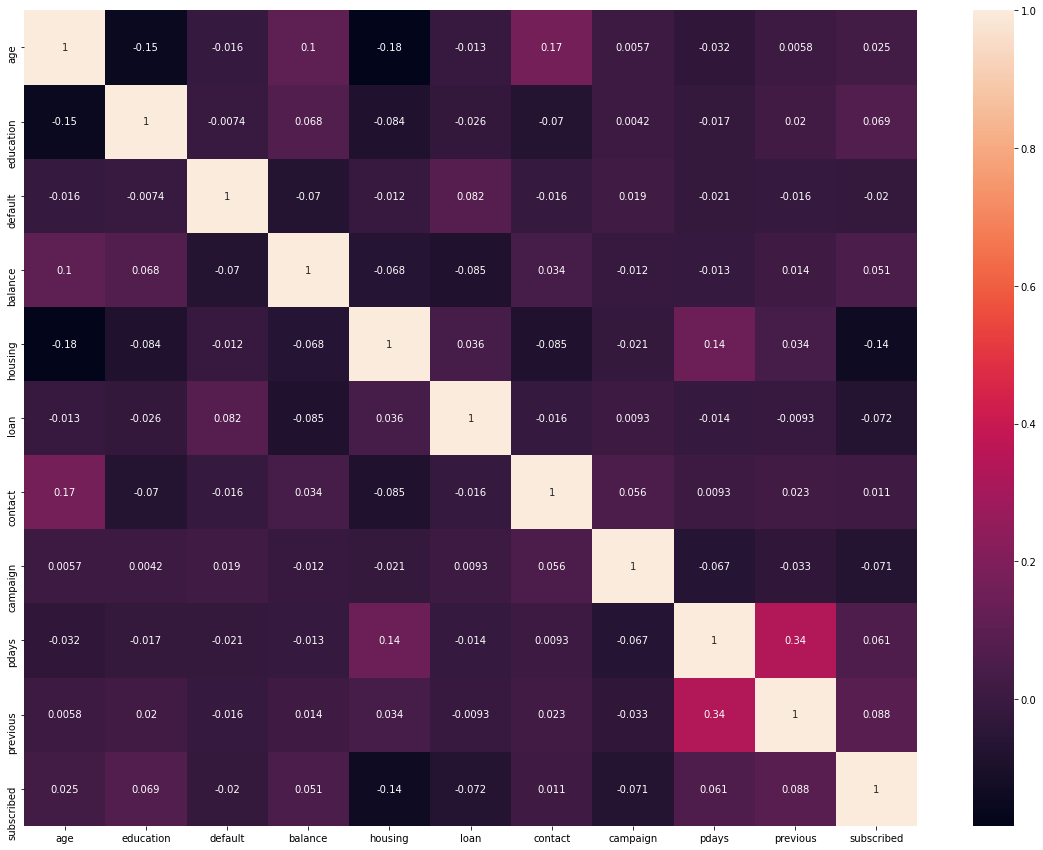

In [77]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True)

Here we can see non of the variable has ny good correlation with dependent varible.subscribed is dependent variable

In [85]:
x=train.drop(['subscribed'],axis=1)
y= train.subscribed.to_frame()

In [86]:
sm=SMOTE()
X_sm, y_sm = sm.fit_resample(x,y)
y_sm.subscribed.value_counts()

1    27932
0    27932
Name: subscribed, dtype: int64

In [95]:
X_train_sm, X_test_sm,y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.35, random_state=30)

In [96]:
X_train_sm.shape

(36311, 13)

In [97]:
X_test_sm.shape

(19553, 13)

In [98]:
y_train_sm

,subscribed
51240,1
53035,1
55552,1
16009,1
9429,0
...,...
33268,1
44845,1
48045,1
4517,0


In [99]:
lr=LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
y_pred = lr.predict(X_test_sm)
confusionmatrix = confusion_matrix(y_test_sm, y_pred)
accuracy = accuracy_score(y_test_sm, y_pred)
print(confusionmatrix)
print(accuracy)

C:\Users\KulkarniPa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[6730 3056]
 [2511 7256]]
0.7152866567790109


C:\Users\KulkarniPa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
y_predsvc = svc.predict(X_test_sm)
cmsvc = confusion_matrix(y_test_sm, y_predsvc)
accsvc = accuracy_score(y_test_sm, y_predsvc)
cmsvc , accsvc

C:\Users\KulkarniPa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(array([[8676, 1110],
        [5907, 3860]], dtype=int64),
 0.6411292384800287)

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_predrf = rf.predict(X_test_sm)
cmrf = confusion_matrix(y_test_sm, y_predrf)
accrf = accuracy_score(y_test_sm, y_predrf)
cmrf , accrf

C:\Users\KulkarniPa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(array([[8432, 1354],
        [1588, 8179]], dtype=int64),
 0.8495371554237201)